In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

In [7]:
df=pd.read_csv(r"C:\Users\mamatha.v\Desktop\ABADS\Project\Hypothesis Python Property\Property_Data_for_Analysis.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,13570,13571,13572,13573,13574,13575,13576,13577,13578,13579
Suburb,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,Abbotsford,...,Wantirna South,Wantirna South,Watsonia,Werribee,Westmeadows,Wheelers Hill,Williamstown,Williamstown,Williamstown,Yarraville
Address,85 Turner St,25 Bloomburg St,5 Charles St,40 Federation La,55a Park St,129 Charles St,124 Yarra St,98 Charles St,6/241 Nicholson St,10 Valiant St,...,34 Fewster Dr,15 Mara Cl,76 Kenmare St,5 Nuragi Ct,9 Black St,12 Strada Cr,77 Merrett Dr,83 Power St,96 Verdon St,6 Agnes St
Rooms,2,2,3,3,4,2,3,2,1,2,...,3,4,2,4,3,4,3,3,4,4
Type,h,h,h,h,h,h,h,h,u,h,...,h,h,h,h,h,h,h,h,h,h
Price,1480000.0,1035000.0,1465000.0,850000.0,1600000.0,941000.0,1876000.0,1636000.0,300000.0,1097000.0,...,970000.0,1330000.0,650000.0,635000.0,582000.0,1245000.0,1031000.0,1170000.0,2500000.0,1285000.0
Method,S,S,SP,PI,VB,S,S,S,S,S,...,S,S,PI,S,S,S,SP,S,PI,SP
SellerG,Biggin,Biggin,Biggin,Biggin,Nelson,Jellis,Nelson,Nelson,Biggin,Biggin,...,Barry,Barry,Morrison,hockingstuart,Red,Barry,Williams,Raine,Sweeney,Village
Date,3/12/2016,4/02/2016,4/03/2017,4/03/2017,4/06/2016,7/05/2016,7/05/2016,8/10/2016,8/10/2016,8/10/2016,...,26/08/2017,26/08/2017,26/08/2017,26/08/2017,26/08/2017,26/08/2017,26/08/2017,26/08/2017,26/08/2017,26/08/2017
Distance,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,...,14.7,14.7,14.5,14.7,16.5,16.7,6.8,6.8,6.8,6.3
Postcode,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,3067.0,...,3152.0,3152.0,3087.0,3030.0,3049.0,3150.0,3016.0,3016.0,3016.0,3013.0


In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Before formation of hypothesis we need to prepare the data by undertaking the EDA

#### 1. Filling the null values-

In [12]:
# For categorical variables-

df[['YearBuilt','CouncilArea','Car']].mode()

,YearBuilt,CouncilArea,Car
0,1970.0,Moreland,2.0


In [14]:
# For continuous variables-

df['BuildingArea'].skew()

77.69154091544215

#### As the skewness for the BuildingArea is very high, we have to fill the missing values with median. 

In [16]:
df['BuildingArea'].median()

126.0

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BuildingArea', ylabel='Density'>

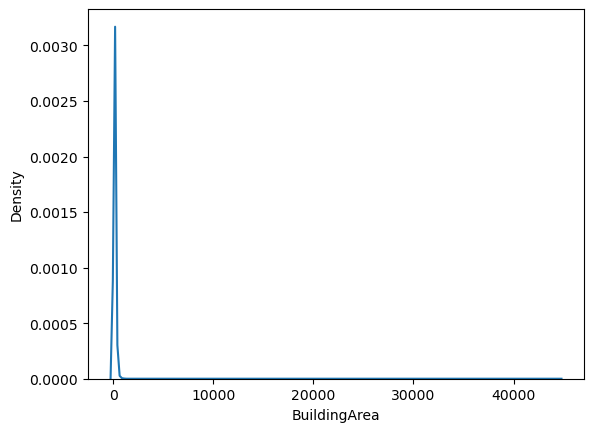

In [18]:
sns.kdeplot(data=df, x=df['BuildingArea'])

As the value of skew is greater than the acceptable range, we will fill the null values for continuous variables with median, and categorical variables with mode.

In [20]:
df.fillna({'Car': df['Car'].median(),
    'BuildingArea': df['BuildingArea'].median(),
    'YearBuilt':df['YearBuilt'].mode()[0],
    'CouncilArea':df['CouncilArea'].mode()[0]},inplace=True)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#### 2. Identification and Removal of the duplicates-

In [22]:
df.duplicated().sum()

0

#### 3. Understanding the statistical distribution of variables (Normality of attribute) and Outlier handling-

Note- Here outlier handling is carried out for only those numerical variables, that follows the normal distribution.  

3.1 For_Rooms_Variable-

((array([-3.88559176, -3.66453928, -3.54336491, ...,  3.54336491,
          3.66453928,  3.88559176]),
  array([ 1,  1,  1, ...,  8,  8, 10], dtype=int64)),
 (0.9059807768806528, 2.9379970544919, 0.947706273613182))

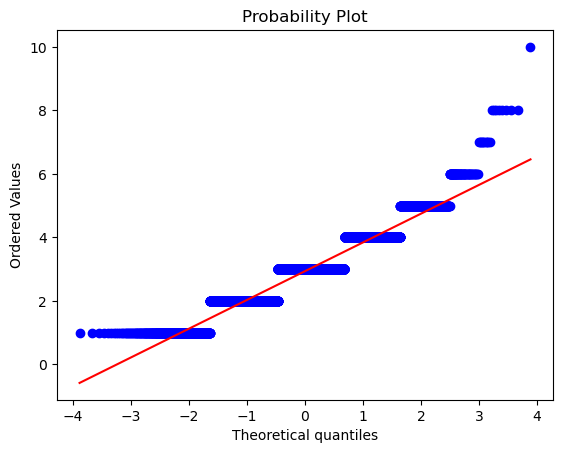

In [24]:
stats.probplot(df['Rooms'], dist='norm', plot=plt)

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rooms', ylabel='Density'>

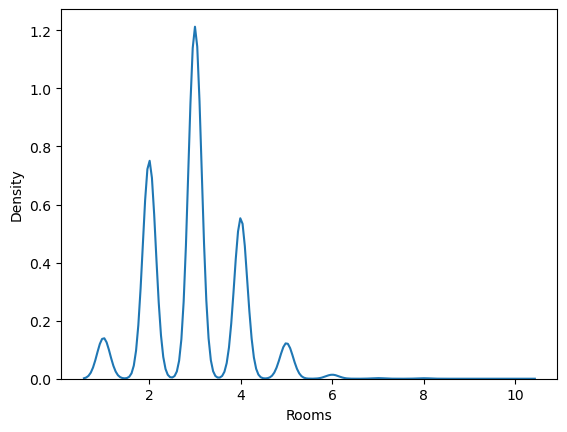

In [26]:
sns.kdeplot(data=df, x=df['Rooms'])

##### Rooms variable does not follow the normal distribution, hence we do not require to handle the outliers. For testing the hypothesis we need to consider the Rooms variable as a numerical variable, discrete in nature

3.2 For_Price_Variable-

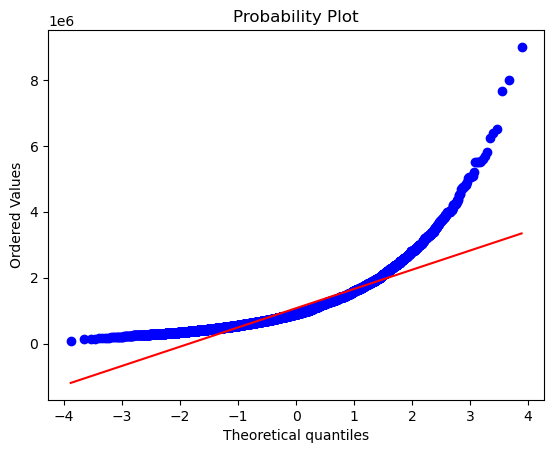

In [28]:
stats.probplot(df['Price'], dist='norm', plot=plt)
plt.show()

##### Price variable follows the normal distribution, hence we need to handle the outlier present in data.

<Axes: xlabel='Price'>

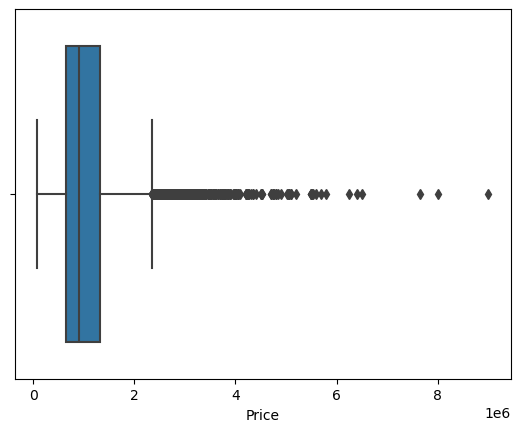

In [30]:
#Boxplot for Price variables before handling the outliers-
sns.boxplot(data=df, x=df['Price'])

In [32]:
# Understanding the range of variable Price-

print(df['Price'].min())
print(df['Price'].max())

#As the spread and skewness is very high, we will use IQR method to handle the outliers.

85000.0
9000000.0


-370000.0
2350000.0
2350000.0
85000.0
0.9230028580146479


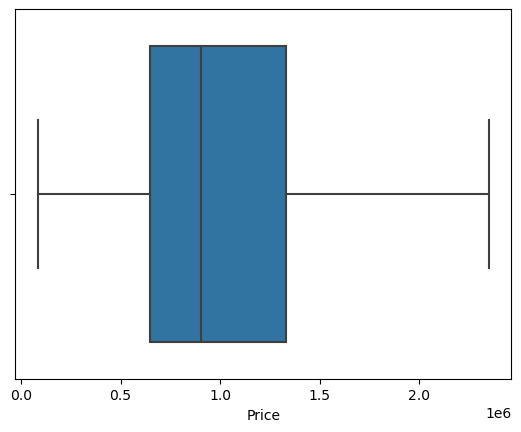

In [34]:
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Price']=np.where(df['Price']>upper_bound,upper_bound,df['Price'])
df['Price']=np.where(df['Price']<lower_bound,lower_bound,df['Price'])

sns.boxplot(data=df, x=df['Price'])
print(df['Price'].max())
print(df['Price'].min())
print(df['Price'].skew())

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

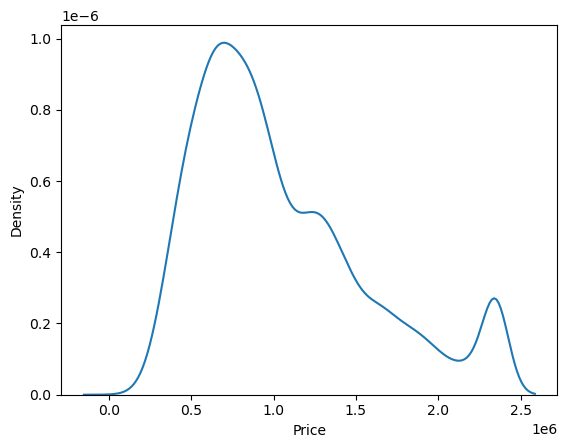

In [36]:
#Distribution of Price variable after handling the outliers-

sns.kdeplot(data=df, x=df['Price'])

3.3 For_Distance_Variable-

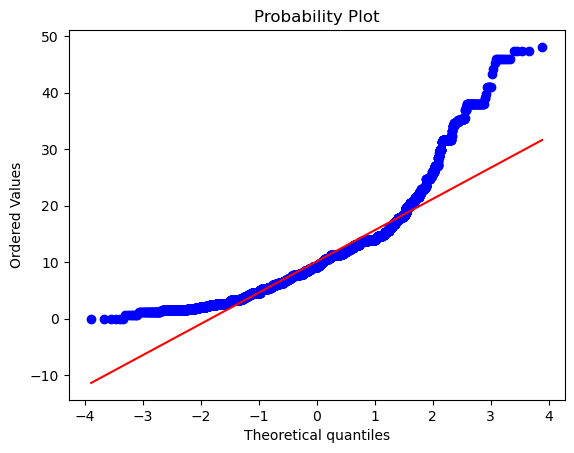

In [38]:
stats.probplot(df['Distance'], dist='norm', plot=plt)
plt.show()

##### Distance variable follows the normal distribution, hence we need to handle the outlier present in the variable.

<Axes: xlabel='Distance'>

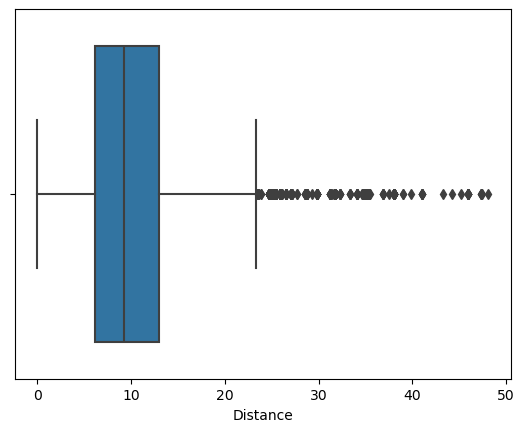

In [40]:
#Boxplot for Distance variables before handling the outliers-

sns.boxplot(data=df, x=df['Distance'])

In [42]:
# Understanding the range of variable Distance-

print(df['Distance'].min())
print(df['Distance'].max())

0.0
48.1


-4.250000000000002
23.35
23.35
0.0
0.6829405739158991


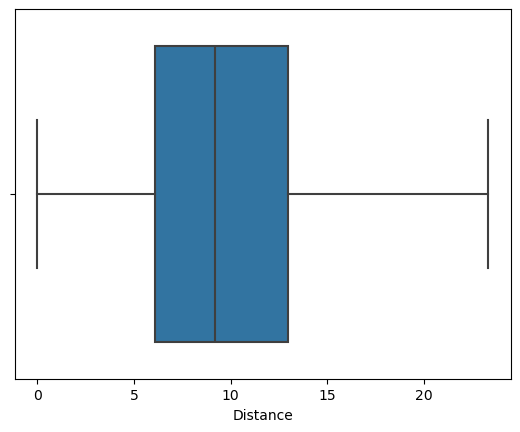

In [44]:
Q1=df['Distance'].quantile(0.25)
Q3=df['Distance'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Distance']=np.where(df['Distance']>upper_bound,upper_bound,df['Distance'])
df['Distance']=np.where(df['Distance']<lower_bound,lower_bound,df['Distance'])

sns.boxplot(data=df, x=df['Distance'])
print(df['Distance'].max())
print(df['Distance'].min())
print(df['Distance'].skew())

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Distance', ylabel='Density'>

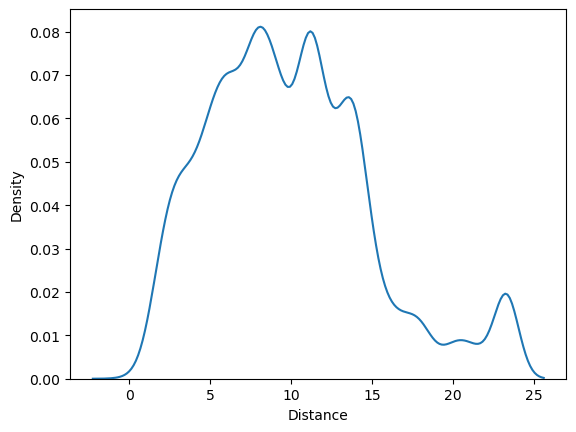

In [46]:
#Distribution of Distance variable after handling the outliers-

sns.kdeplot(data=df, x=df['Distance'])

3.4 For_Bedroom2_Variable-

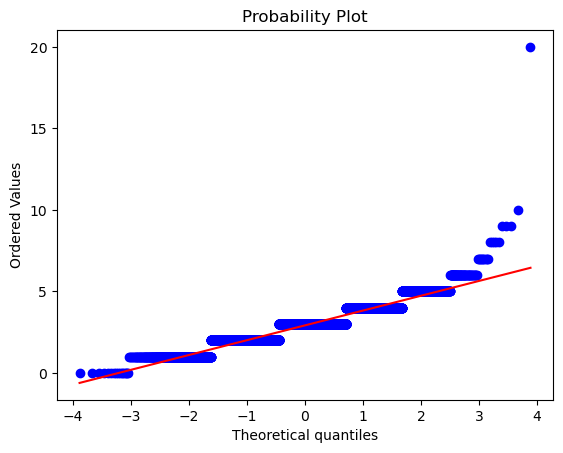

In [48]:
stats.probplot(df['Bedroom2'], dist='norm', plot=plt)
plt.show()

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bedroom2', ylabel='Density'>

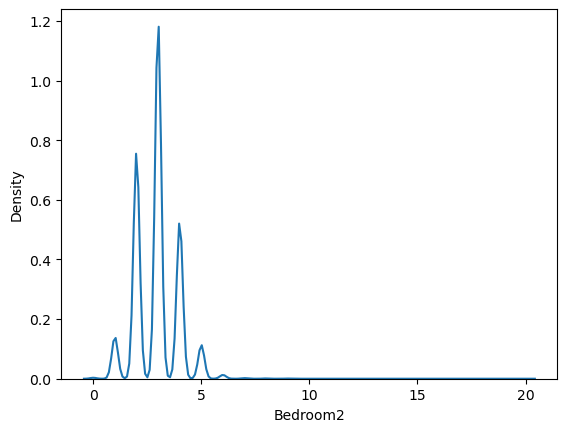

In [50]:
sns.kdeplot(data=df, x=df['Bedroom2'])

From the above 2 plots, Bedroom2 variable will be treated as numerical discrete variable.

3.5 For_Bathroom_Variable-

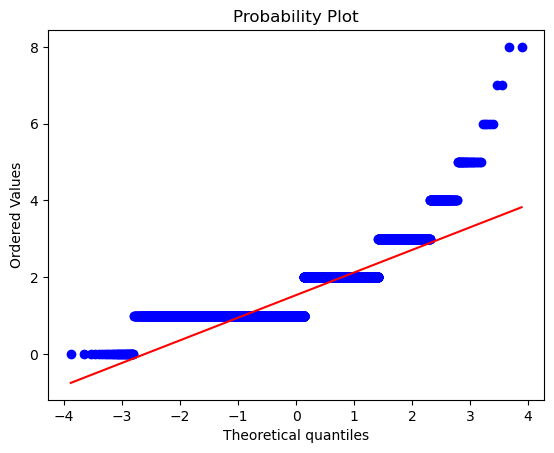

In [52]:
stats.probplot(df['Bathroom'], dist='norm', plot=plt)
plt.show()

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bathroom', ylabel='Density'>

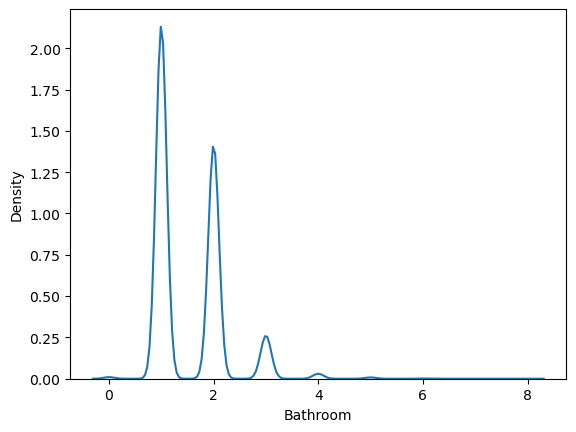

In [54]:
sns.kdeplot(data=df, x=df['Bathroom'])

From the above 2 plots, Bathroom variable will be treated as numerical discrete variable.

3.6 For_Car_Variable-

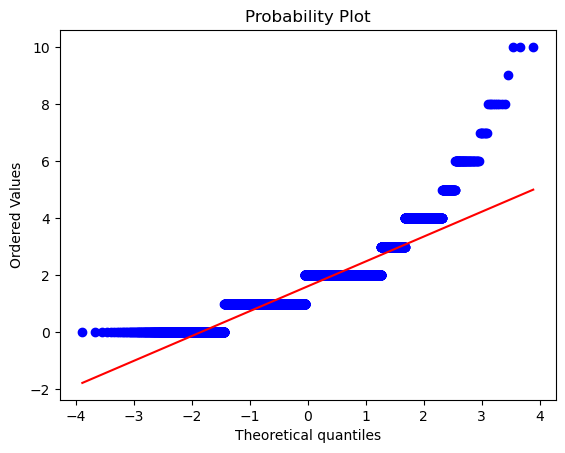

In [26]:
stats.probplot(df['Car'], dist='norm', plot=plt)
plt.show()

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Car', ylabel='Density'>

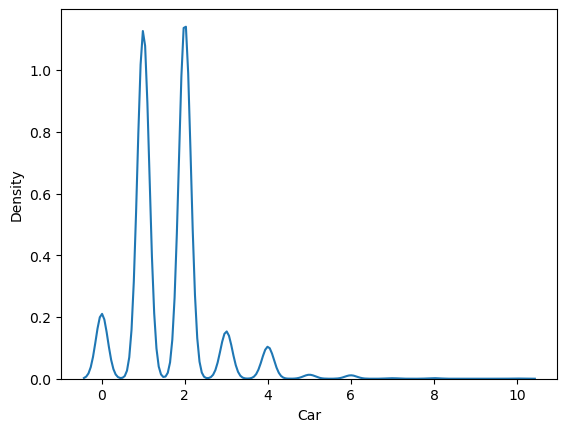

In [56]:
sns.kdeplot(data=df, x=df['Car'])

From the above 2 plots, Car variable will be treated as numerical discrete variable.

3.7 For_Landsize_Variable-

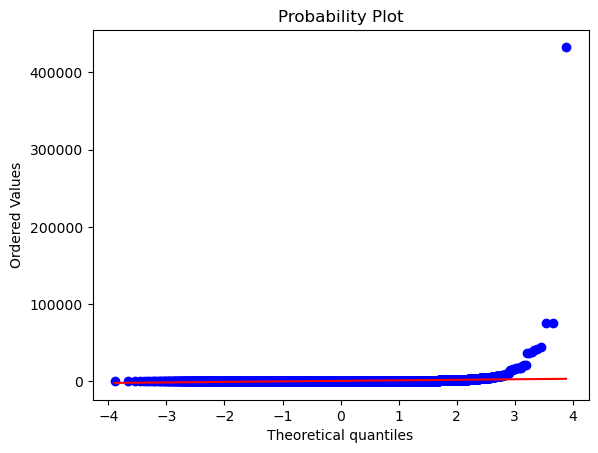

In [58]:
stats.probplot(df['Landsize'], dist='norm', plot=plt)
plt.show()

##### Landsize variable follows the normal distribution, hence we need to handle the outlier present in data.

<Axes: xlabel='Landsize'>

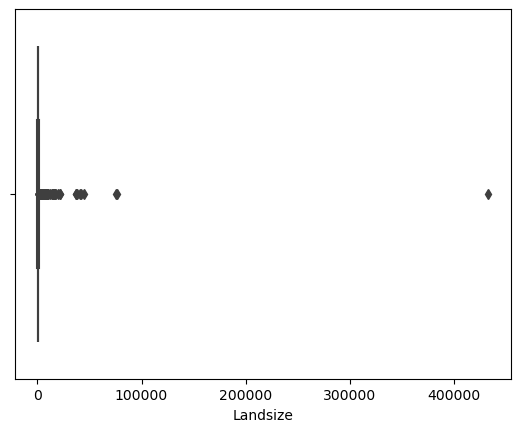

In [60]:
#Boxplot for Landsize variables before handling the outliers-
sns.boxplot(data=df, x=df['Landsize'])

In [62]:
print(df['Landsize'].min())
print(df['Landsize'].max())

0.0
433014.0


-534.0
1362.0
1362.0
0.0
0.5897105129280794


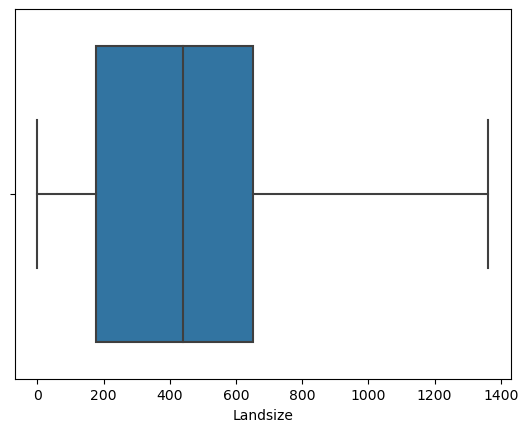

In [31]:
Q1=df['Landsize'].quantile(0.25)
Q3=df['Landsize'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Landsize']=np.where(df['Landsize']>upper_bound,upper_bound,df['Landsize'])
df['Landsize']=np.where(df['Landsize']<lower_bound,lower_bound,df['Landsize'])

sns.boxplot(data=df, x=df['Landsize'])
print(df['Landsize'].max())
print(df['Landsize'].min())
print(df['Landsize'].skew())

<Axes: xlabel='Landsize', ylabel='Density'>

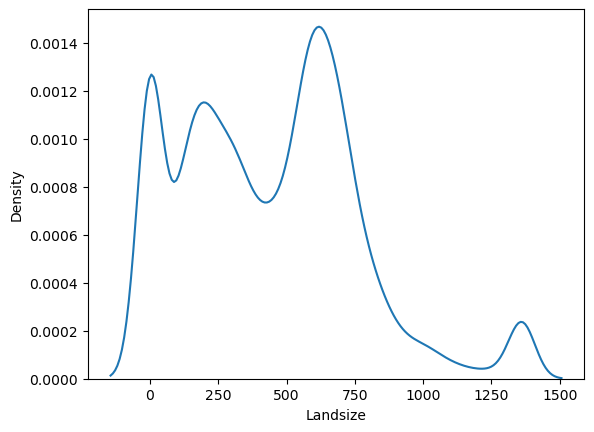

In [32]:
sns.kdeplot(data=df, x=df['Landsize'])

3.8 For_BuildingArea_Variable-

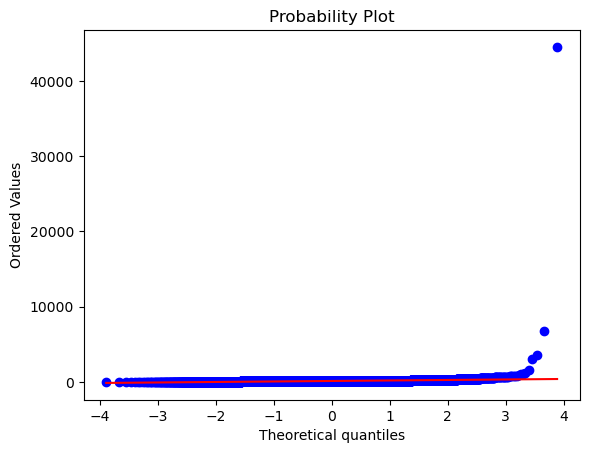

In [33]:
stats.probplot(df['BuildingArea'], dist='norm', plot=plt)
plt.show()

<Axes: xlabel='BuildingArea'>

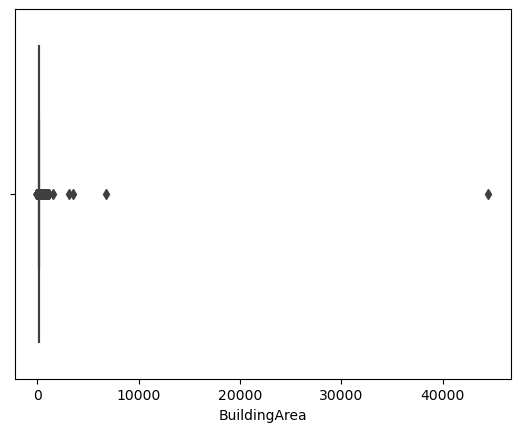

In [34]:
#Boxplot for BuildingArea variables before handling the outliers-

sns.boxplot(data=df, x=df['BuildingArea'])

In [66]:
print(df['BuildingArea'].min())
print(df['BuildingArea'].max())

110.09
141.85


110.09
141.85
141.85
110.09
0.0022196191477746848


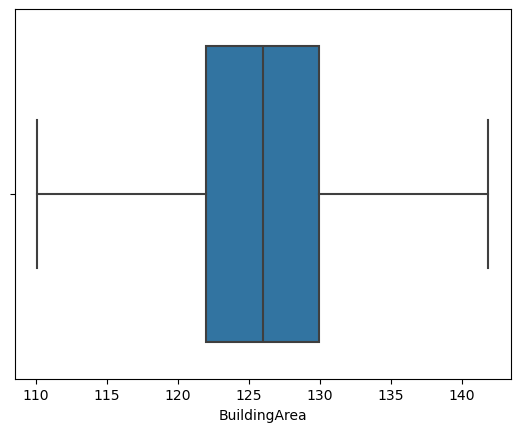

In [64]:
Q1=df['BuildingArea'].quantile(0.25)
Q3=df['BuildingArea'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['BuildingArea']=np.where(df['BuildingArea']>upper_bound,upper_bound,df['BuildingArea'])
df['BuildingArea']=np.where(df['BuildingArea']<lower_bound,lower_bound,df['BuildingArea'])

sns.boxplot(data=df, x=df['BuildingArea'])
print(df['BuildingArea'].max())
print(df['BuildingArea'].min())
print(df['BuildingArea'].skew())

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BuildingArea', ylabel='Density'>

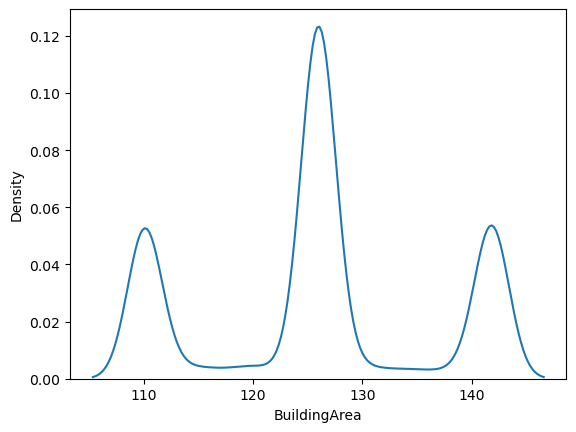

In [68]:
sns.kdeplot(data=df, x=df['BuildingArea'])

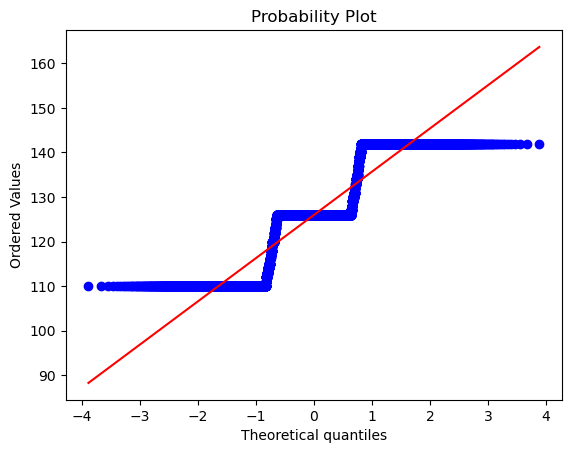

In [70]:
stats.probplot(df['BuildingArea'], dist='norm', plot=plt)
plt.show()

3.9 For_Propertycount_Variable-

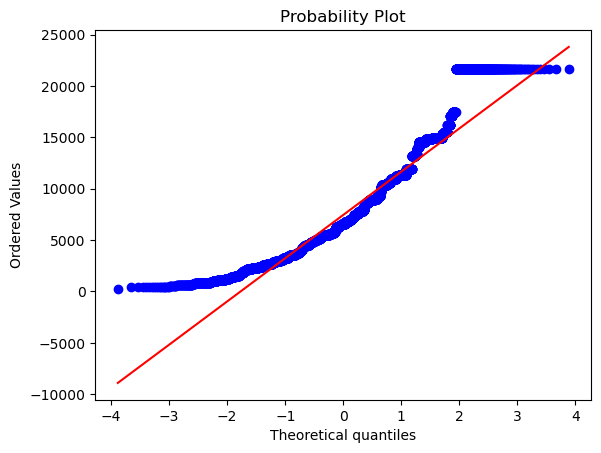

In [72]:
stats.probplot(df['Propertycount'], dist='norm', plot=plt)
plt.show()

<Axes: xlabel='Propertycount'>

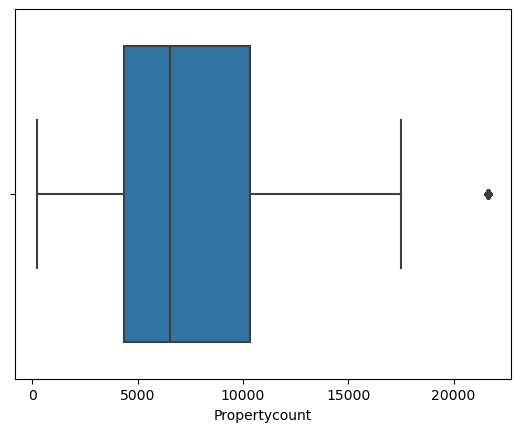

In [40]:
#Boxplot for BuildingArea variables before handling the outliers-
sns.boxplot(data=df, x=df['Propertycount'])

In [74]:
print(df['Propertycount'].min())
print(df['Propertycount'].max())

249.0
21650.0


-4546.5
19257.5
19257.5
249.0
0.8306363625166718


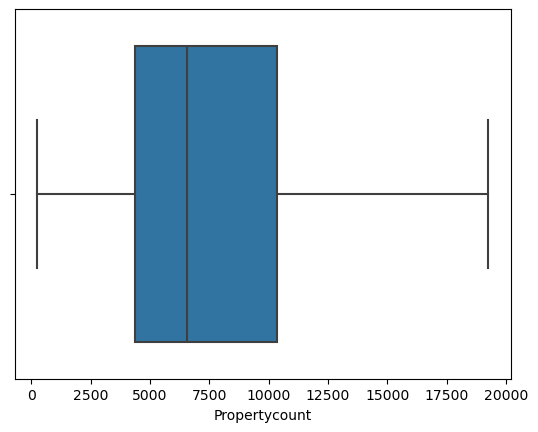

In [76]:
Q1=df['Propertycount'].quantile(0.25)
Q3=df['Propertycount'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

df['Propertycount']=np.where(df['Propertycount']>upper_bound,upper_bound,df['Propertycount'])
df['Propertycount']=np.where(df['Propertycount']<lower_bound,lower_bound,df['Propertycount'])

sns.boxplot(data=df, x=df['Propertycount'])
print(df['Propertycount'].max())
print(df['Propertycount'].min())
print(df['Propertycount'].skew())

C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Propertycount', ylabel='Density'>

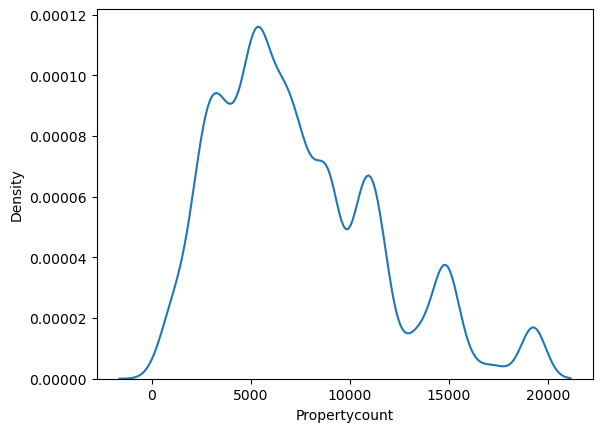

In [78]:
sns.kdeplot(data=df, x=df['Propertycount'])

#### 4. Final dataframe after EDA-

In [80]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    13580 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

#### 5. After performing the EDA the nature of variables present inthe dataframe are as follows-
Categorical_Variables-

1. Suburb- 
2. Address-  
3. Type- 
4. Method- 
5. SellerG- 
6. Date- 
7. Postcode- 
8. YearBuilt- 
9. CouncilArea- 
10. Regionname- 

Numerical_Descrete_Variables-

11. Car- 
12. Rooms- 
13. Bedroom2- 
14. Bathroom- 

Numerical_Continuous_Variables-

15. Price- 
16. Distance- 
17. Landsize- 
18. BuildingArea- 
19. Latitude- 
20. Longitude- 
21. Propertycount- 

##### Note- Nature of these variables will be the base for hypothesis testing and will determine the appropriate statistical test use.

# Hypotheis_1-

For the suburb Altona, it is postulated that a typical property sells for USD 800,000. Use the data at hand to test this assumption. Is the typical property price really USD 800,000 or has it increased? Use a significance level of 5%.

In [88]:
df_1=df[(df['Suburb']=='Altona')]
Price_Altona=df_1['Price']
Price_Altona.info()

<class 'pandas.core.series.Series'>
Index: 74 entries, 141 to 13339
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
74 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


Now we need to understand the distribution of Price variable for Suburb Altona, to check which test would be more suitable for the hypothesis testing.

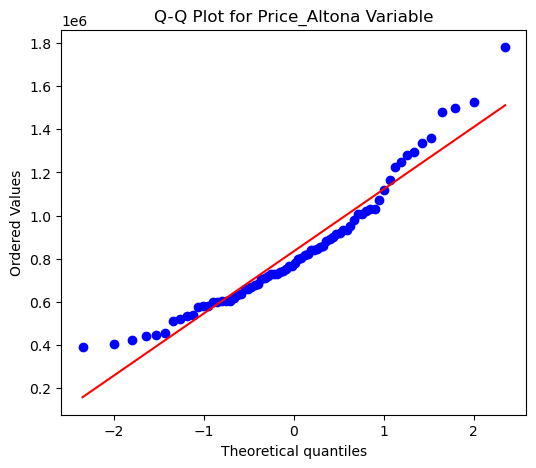

In [90]:
# Understanding normality and statistical distribution of the variable-

plt.figure(figsize=(6,5))
stats.probplot(df_1['Price'], dist='norm', plot=plt)
plt.title('Q-Q Plot for Price_Altona Variable')
plt.show()

Skewness_of_Price_Variable: 0.98


C:\Users\mamatha.v\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


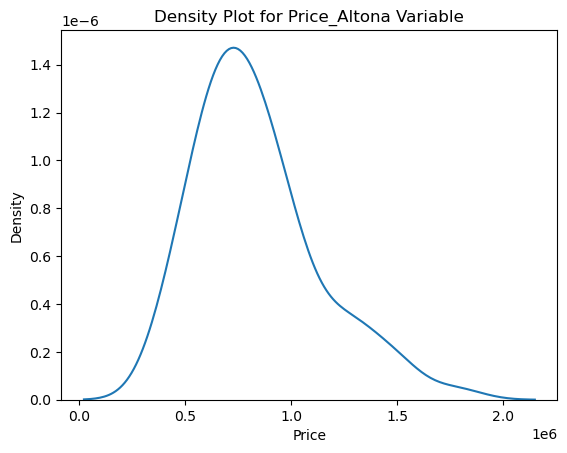

In [92]:
# Understanding skewness of the variable-
print('Skewness_of_Price_Variable:', df_1['Price'].skew().round(2))

sns.kdeplot(data=df_1, x=df_1['Price'])
plt.title('Density Plot for Price_Altona Variable')
plt.show()

### Hypothesis_testing_Steps-

#### Step_1 Setting the hypothesis-
Null_hypothesis(H0)= The property price in Altona is USD 800,000.

Alternate_hypothesis(H1)= The property price in Altona is greater than USD 800,000.

#### Step_2 Selection of the Alpha Value(Level of Significance)-
To test the hypothesis, the level of significance given was 5%.(Alpha=0.05)

#### Step_3 Selection of suitable statistical test, to test the hypothesis-
As we have to check whether the price of property has got increased than USD 800,000 and the Price variable holds observations higher than 30 (Large sample) we can use the one sample t-test. 

###### Nature of variable under study-
Price variable= Continuous numerical variable

#### Step_4 Calculation of P-value-

In [94]:
Population_mean = 800000

t_statistic, p_value = stats.ttest_1samp(Price_Altona, Population_mean)

# One-tailed test: Check if the property price has increased

if t_statistic > 0:
    p_value /= 2

print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: 1.0277020770199676, P-value: 0.1537416356527775


#### Step_5 Reject Null Hypothesis (H0) or failed to reject Null Hypothesis(H1)-

In [96]:
# Interpretation based on 5% significance level-

if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


#### Step_6 Conclusion- 
The typical property price for Altona remains close to USD 800,000. Hence, the logical guess/assumption of increase in price for property price for Altona Suburb is not validated/can't hold statistical base. 

# Hypotheis_2-
For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%. 

### Hypothesis_testing_Steps-

#### Step_1 Setting the hypothesis-
Null_hypothesis(H0)= There is no significant difference between prices of properties sold in the summer and winter months.

Alternate_hypothesis(H1)= There is a significant difference between prices of properties sold in the summer and winter months.

#### Step_2 Selection of the Alpha Value(Level of Significance)-
To test the hypothesis, the level of significance given was 5%.(Alpha=0.05)

#### Step_3 Selection of suitable statistical test, to test the hypothesis-
As we have to check whether there exists a significant difference for price of property sold in summer month and winter month, hence we will use the independent sample t-test. 

##### Variables under study-
Price= Continuous Normal Variable

Sample_1= Data for Summer Months [April to September]- This sample is derived from the df in the following section of analysis

Sample_2= Data for Winter Months [October to March]-This sample is derived from the df in the following section of analysis

To work with the datetime variable, we need to convert datatype of Date column [From Object to datetime].

In [98]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [100]:
# Extraction of Year and Month in new columns-

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df[['Month','Year']].value_counts()

Month  Year
7      2017    1536
5      2017    1130
11     2016    1114
6      2017    1098
9      2016     925
       2017     920
5      2016     899
8      2017     834
6      2016     732
8      2016     716
3      2017     678
4      2017     631
12     2016     607
10     2016     551
7      2016     446
2      2017     417
4      2016     318
2      2016      26
1      2016       2
Name: count, dtype: int64

In [102]:
# Sample_1= Data for Summer Months[April to September]-

Sample_1=df.loc[(df['Year']== 2016) & (df['Month']>3) & (df['Month']<10)]
Sample_1['Month'].unique()

array([6, 5, 8, 7, 9, 4])

In [104]:
#Sample_2= Data for Winter Months [October to March]-

Sample_2a=df.loc[(df['Year']== 2016) & (df['Month']>9)]
Sample_2a['Month'].unique()

Sample_2b=df.loc[(df['Year']== 2016) & (df['Month']<4)]
Sample_2b['Month'].unique()

Sample_2=pd.concat([Sample_2a,Sample_2b],axis=0)
Sample_2['Year'].unique()
Sample_2['Month'].unique()

array([12, 10, 11,  2,  1])

#### Step_4 Calculation of P-value-

In [106]:
Summer_Prices=Sample_1['Price']
Summer_Prices

Winter_Prices=Sample_2['Price']
Winter_Prices

0       1480000.0
7       1636000.0
8        300000.0
9       1097000.0
10       700000.0
          ...    
6634     890000.0
6888     645000.0
7168     250000.0
7224    1415000.0
7282     765000.0
Name: Price, Length: 2300, dtype: float64

In [108]:
#Compairing means of summer and winter prices-

print('Mean of the Summer Prices is:',Summer_Prices.mean().round(2))
print('Mean of the Winter Prices is:',Winter_Prices.mean().round(2))

#Compairing variance of summer and winter prices-

print('Variance of the Summer Prices is:',Summer_Prices.var())
print('Variance of the Winter Prices is:',Winter_Prices.var())

#There exists a significant difference in the variances of the Summer Prices and Winter Prices. 

Mean of the Summer Prices is: 1021100.69
Mean of the Winter Prices is: 1071560.47
Variance of the Summer Prices is: 281920044356.0879
Variance of the Winter Prices is: 296755282076.8028


In [110]:
t_stat, p_value = stats.ttest_ind(Summer_Prices, Winter_Prices, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.5781192143559557
P-value: 0.0003495792100192564


#### Step_5 Reject Null Hypothesis (H0) or failed to reject Null Hypothesis(H1)-

In [112]:
# Interpretation based on 5% significance level-

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


#### Step_6 Conclusion- 
For the year 2016, there exists a significant statistical difference for prices of sold properties for Summer months [April to September] and Winter months [October to March].

# Hypotheis_3-
For the suburb Abbotsford, what is the probability that out of 10 properties sold, 3 will not have car parking? Use the column car in the dataset. Round off your answer to 3 decimal places. 

In [114]:
df_3=df.loc[(df['Suburb']=='Abbotsford')]
df_3['Suburb'].unique()
Car_Parking=df_3['Car']
Car_Parking.skew()
Car_Parking.unique()
Car_Parking.max()
Car_Parking.shape

(56,)

### Hypothesis_testing_Steps-

The question is to check the likeliness that out of 10 properties sold, 3 will not have car parking.

#### Step_1 Setting the hypothesis-
Null_hypothesis(H0)= The probability of a property sold having car parking is 30%. 

Alternate_hypothesis(H1)= The probability of a property sold not having car parking is 30%.

#### Step_2 Selection of the Alpha Value(Level of Significance)-
To test the hypothesis, the level of significance considered was 5%.(Alpha=0.05)

#### Step_3 Selection of suitable statistical test, to test the hypothesis-
For the above question- 
1. The number of trials is fixed (e.g., 10 properties sold).
2. Each trial has two possible outcomes (e.g., property has car parking or it does not).
3. The probability of success (e.g., a property not having car parking) remains the same across trials.


Hence, for the above conditions Binomial Distribution is appropriate as we want to calculate the probability that exactly 3 out of 10 properties will not have car parking.

#### Step_4 Calculation of the P_value-

In [59]:
from scipy.stats import binom_test

# Parameters for the binomial test

n = 10  # number of trials (properties sold)
k = 3   # number of properties without car parking
p_null = 0.3  # hypothesized proportion (30% without car parking)

In [60]:
# Perform binomial test-

p_value = binom_test(k, n, p_null, alternative='two-sided')

# Print results-

print(f"Binomial test p-value: {p_value:.3f}")

Binomial test p-value: 1.000


C:\Users\aniru\AppData\Local\Temp\ipykernel_9408\3177248475.py:3: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(k, n, p_null, alternative='two-sided')


#### Step_5 Reject Null Hypothesis (H0) or failed to reject Null Hypothesis(H1)-

In [116]:
# Hypothesis decision-

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Reject the null hypothesis.


#### Step_6 Conclusion-

The probability of a property sold having car parking is 30%. 

#### Step_7 Probability Calculation for the given condition-  

In [118]:
from scipy.stats import binom

# Parameters-

n = 10  # number of trials (properties sold)
k = 3   # number of properties without car parking
p_no_car = 0.3  # probability of a property not having car parking

# Calculate the binomial probability P(X = k)-

binom_prob = binom.pmf(k, n, p_no_car)

# Print the result-

print(f"Probability that exactly 3 out of 10 properties sold (30%) will not have car parking in Percentage= {(binom_prob*100).round(3)}")

Probability that exactly 3 out of 10 properties sold (30%) will not have car parking in Percentage= 26.683


# Hypotheis_4-
In the suburb Abbotsford, what are the chances of finding a property with 3 rooms? Round your answer to 3 decimal places. 

In [121]:
df_3=df.loc[(df['Suburb']=='Abbotsford')]
Rooms=df_3['Rooms']
Rooms.shape

(56,)

Now we need to check the statistical distribution being followed by Rooms varable for suburb Abbotsford. Depending on which we have to appropriately select parametric or non-parametric statistical test to calculate the chances of finding probability with 3 rooms.

### Hypothesis_testing_Steps-

The question is to check the probabilistic distribution of the Rooms variable.

#### Step_1 Setting the hypothesis-
Null_hypothesis(H0)= The rooms variable follows normal distribution. 

Alternate_hypothesis(H1)= The rooms variable does not follow normal distribution.

#### Step_2 Selection of the Alpha Value(Level of Significance)-
To test the hypothesis, the level of significance considered was 5%.(Alpha=0.05)

#### Step_3 Selection of suitable statistical test, to test the hypothesis-
For the above question we will move ahed with Shapiro-Wilk test

#### Step_4 Calculation of the P_value-

In [123]:
# Perform the Shapiro-Wilk test-
stat, p_value = stats.shapiro(Rooms)

# Output the test statistic and p-value
print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 0.8479910492897034, p-value: 5.041802069172263e-06


#### Step_5 Reject Null Hypothesis (H0) or failed to reject Null Hypothesis(H1)-

In [125]:
# Interpret the result-

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


((array([-2.24758475, -1.88300147, -1.66866807, -1.51148003, -1.3846837 ,
         -1.27691511, -1.18222804, -1.09709871, -1.0192564 , -0.94714623,
         -0.87965307, -0.81594727, -0.75539284, -0.6974898 , -0.64183653,
         -0.58810422, -0.53601909, -0.48534961, -0.43589711, -0.38748877,
         -0.33997228, -0.2932116 , -0.24708372, -0.20147594, -0.15628363,
         -0.11140844, -0.06675659, -0.02223751,  0.02223751,  0.06675659,
          0.11140844,  0.15628363,  0.20147594,  0.24708372,  0.2932116 ,
          0.33997228,  0.38748877,  0.43589711,  0.48534961,  0.53601909,
          0.58810422,  0.64183653,  0.6974898 ,  0.75539284,  0.81594727,
          0.87965307,  0.94714623,  1.0192564 ,  1.09709871,  1.18222804,
          1.27691511,  1.3846837 ,  1.51148003,  1.66866807,  1.88300147,
          2.24758475]),
  array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 

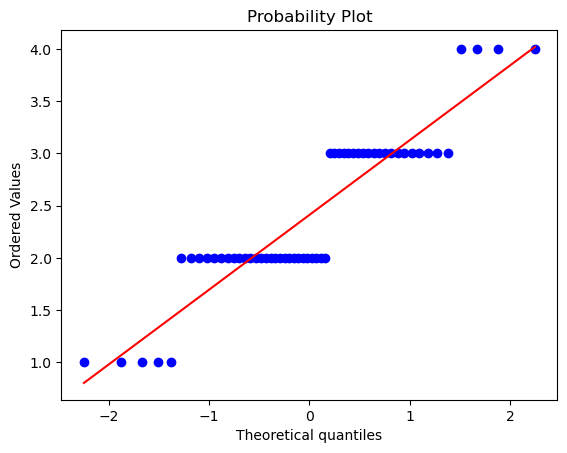

In [127]:
#Visualizing the statistical distribution follwed by Rooms variable using (Q-Q Plot)-

stats.probplot(df_3['Rooms'], dist='norm', plot=plt)

#### Step_6 Conclusion-

From step-5 we can conclude that, the Rooms variable for suburb Abbotsford does not follow the normal distribution. Hence we can not use parametric statistical test to calculate the probability.

#### Step_7 Conclusion and Probability Calculation for the given condition-  

In [129]:
# Count the number of properties with exactly 3 rooms-
Count_rooms_3 = (df_3['Rooms'] == 3).sum()

# Calculate the total number of properties-
Total_properties = (df_3['Rooms']).count()

print('Total_Properties_Sold_in_Suburb_Abbotsford:',Total_properties)
print('Total_Properties_Sold_in_Suburb_Abbotsford_with_3-Rooms:',Count_rooms_3)

df_3['Rooms'].value_counts()

Total_Properties_Sold_in_Suburb_Abbotsford: 56
Total_Properties_Sold_in_Suburb_Abbotsford_with_3-Rooms: 20


Rooms
2    27
3    20
1     5
4     4
Name: count, dtype: int64

In [131]:
# Calculate the probability
Probability=(Count_rooms_3/Total_properties)
Probability

print(f"Probability to find a property with 3 rooms: {(Probability*100):.3f}")

Probability to find a property with 3 rooms: 35.714


# Hypotheis_5-
In the suburb Abbotsford, what are the chances of finding a property with 2 bathrooms? Round your answer to 3 decimal places. 

In [133]:
df_3=df.loc[(df['Suburb']=='Abbotsford')]
Bathroom=df_3['Bathroom']
Bathroom.shape

(56,)

Now we need to check the statistical distribution being followed by Bathroom varable for suburb Abbotsford. Depending on which we have to appropriately select parametric or non-parametric statistical test to calculate the chances of finding probability with 2 Bathrooms.

### Hypothesis_testing_Steps-

The question is to check the probabilistic distribution of the Bathroom variable.

#### Step_1 Setting the hypothesis-
Null_hypothesis(H0)= The Bathroom variable follows normal distribution. 

Alternate_hypothesis(H1)= The Bathroom variable does not follow normal distribution.

#### Step_2 Selection of the Alpha Value(Level of Significance)-
To test the hypothesis, the level of significance considered was 5%.(Alpha=0.05)

#### Step_3 Selection of suitable statistical test, to test the hypothesis-
For the above question we will move ahed with Shapiro-Wilk test, as we want to check the statistical distribution being followed by the Bathroom variable.

#### Step_4 Calculation of the P_value-

In [135]:
# Perform the Shapiro-Wilk test-
stat, p_value = stats.shapiro(Bathroom)

# Output the test statistic and p-value
print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 0.6713756918907166, p-value: 6.374063499237081e-10


#### Step_5 Reject Null Hypothesis (H0) or failed to reject Null Hypothesis(H1)-

In [137]:
# Interpret the result-

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


((array([-2.24758475, -1.88300147, -1.66866807, -1.51148003, -1.3846837 ,
         -1.27691511, -1.18222804, -1.09709871, -1.0192564 , -0.94714623,
         -0.87965307, -0.81594727, -0.75539284, -0.6974898 , -0.64183653,
         -0.58810422, -0.53601909, -0.48534961, -0.43589711, -0.38748877,
         -0.33997228, -0.2932116 , -0.24708372, -0.20147594, -0.15628363,
         -0.11140844, -0.06675659, -0.02223751,  0.02223751,  0.06675659,
          0.11140844,  0.15628363,  0.20147594,  0.24708372,  0.2932116 ,
          0.33997228,  0.38748877,  0.43589711,  0.48534961,  0.53601909,
          0.58810422,  0.64183653,  0.6974898 ,  0.75539284,  0.81594727,
          0.87965307,  0.94714623,  1.0192564 ,  1.09709871,  1.18222804,
          1.27691511,  1.3846837 ,  1.51148003,  1.66866807,  1.88300147,
          2.24758475]),
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        

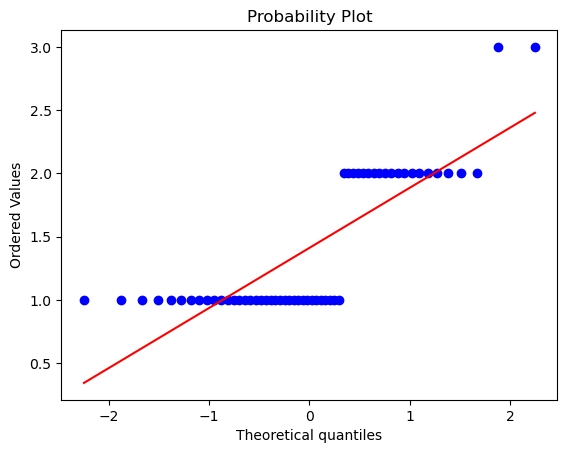

In [72]:
#Visualizing the statistical distribution follwed by Bathroom variable using (Q-Q Plot)-

stats.probplot(df_3['Bathroom'], dist='norm', plot=plt)

#### Step_6 Conclusion-

The Bathroom variable for suburb Abbotsford does not follow the normal distribution. We can not use parametric test to calculate the probability.

#### Step_7 Conclusion and Probability Calculation for the given condition-  

In [139]:
# Count the number of properties with exactly 2 Bathrooms-
Count_bathrooms_2=(df_3['Bathroom']==2.0).sum()

# Calculate the total number of properties-
Total_properties_1=(df_3['Bathroom']).count()

print('Total_Properties_Sold_in_Suburb_Abbotsford_having_atleast_one_Bathroom:',Total_properties_1)
print('Total_Properties_Sold_in_Suburb_Abbotsford_with_2-Bathrooms:',Count_bathrooms_2)

Total_Properties_Sold_in_Suburb_Abbotsford_having_atleast_one_Bathroom: 56
Total_Properties_Sold_in_Suburb_Abbotsford_with_2-Bathrooms: 19


In [143]:
df_3['Bathroom'].unique()
df_3['Bathroom'].value_counts()

Bathroom
1.0    35
2.0    19
3.0     2
Name: count, dtype: int64

In [77]:
# Calculate the probability-

Probability=(Count_bathrooms_2/Total_properties_1)
Probability

print(f"Probability to find a property with 2 Bathroom: {(Probability*100):.3f}")

Probability to find a property with 2 Bathroom: 33.929
